C:\Users\khard\.conda\envs\tf\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


(300, 180, 3)


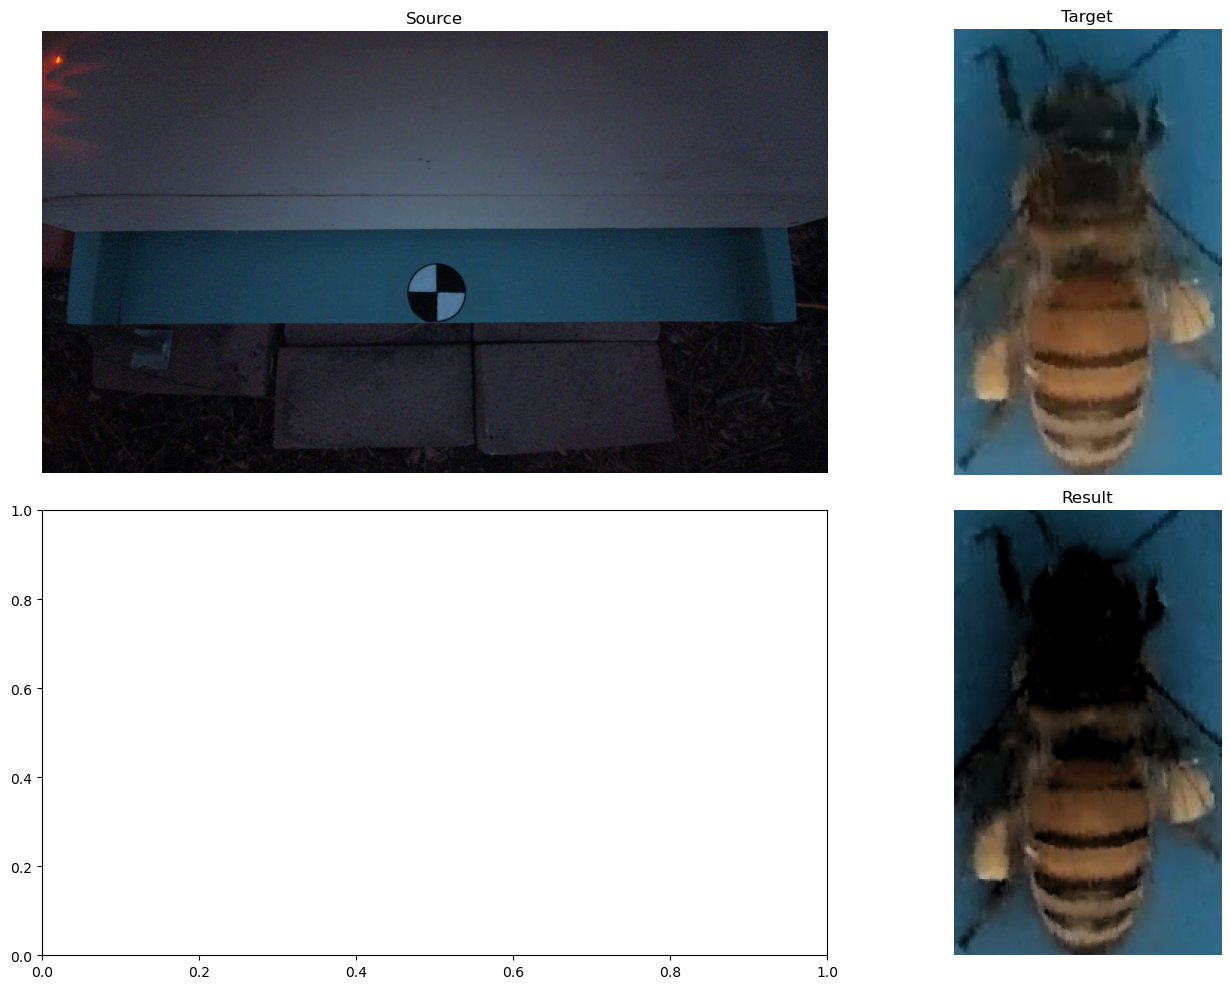

In [15]:
# import the necessary packages
import sys
import os
sys.path.append('C:\\Users\\khard\\OneDrive\\Documents\\GitHub\\GEORGE')
from GEORGE_Library import *
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

def image_stats(image):
    # compute the mean and standard deviation of each channel
    (first, second, third) = cv2.split(image)
    (firstMean, firstStd) = (first.mean(), first.std())
    (secondMean, secondStd) = (second.mean(), second.std())
    (thirdMean, thirdStd) = (third.mean(), third.std())
    # return the color statistics
    return (firstMean, firstStd, secondMean, secondStd, thirdMean, thirdStd)

def brightness_match(src_img, tgt_img):
    print(tgt_img.shape)
    if tgt_img.shape[-1] == 4:
        _, _, _, alpha = tgt_img.split
    #convert both images to HSV
    source = cv2.cvtColor(src_img, cv2.COLOR_BGR2HSV).astype("float32")
    target = cv2.cvtColor(tgt_img, cv2.COLOR_BGR2HSV).astype("float32")
    
    #Compute the mean and standard deviation of only the V channels for both the source and target images.
    (hMeanSrc, hStdSrc, sMeanSrc, sStdSrc, vMeanSrc, vStdSrc) = image_stats(source)
    (hMeanTar, hStdTar, sMeanTar, sStdTar, vMeanTar, vStdTar) = image_stats(target)
    
    #Subtract the mean of the target V channel from itself.
    (h, s, v) = cv2.split(target)
    v -= vMeanTar
    
    #Scale the target V by the ratio of the standard deviation of the target V divided by the standard deviation of the source V, multiplied by the target V.
    v = (vStdTar / vStdSrc) * v
    
    #Add the mean of the source V channel to the target V channel.
    v += vMeanSrc
    
    #Clip any values that fall outside the range [0, 255].
    v = np.clip(v, 0, 255)
    
    #Merge the target channels back together.
    transfer = cv2.merge([h, s, v])
    
    #Convert target back to the RGB color space and return image
    transfer = cv2.cvtColor(transfer.astype("uint8"), cv2.COLOR_HSV2BGR)
    return transfer

src_img = np.array(Image.open("C:\\Users\\khard\\OneDrive\\Documents\\GitHub\\GEORGE\\Pi_Images\\image_24-02-22_18_32_09.png"))
tgt_img = np.array(Image.open("C:\\Users\\khard\\OneDrive\\Documents\\GitHub\\GEORGE\\BG_Remove\\blue_reference_img.png"))

transfer = brightness_match(src_img, tgt_img)

fig, ax = plt.subplots(2, 2, figsize=(15,10))
ax[0, 0].axis('off')
ax[0, 0].imshow(src_img)
ax[0, 0].set_title("Source")
ax[0, 1].axis('off')
ax[0, 1].imshow(tgt_img)
ax[0, 1].set_title("Target")
ax[1, 1].axis('off')
ax[1, 1].imshow(transfer)
ax[1, 1].set_title("Result")

plt.tight_layout()
plt.show()

In [22]:
import glob
import numpy as np
from PIL import Image
import os
from statistics import mean

r = []
g = []
b = []

images = 'C:/Users/khard/OneDrive/Documents/GitHub/GEORGE/Dataset/BeeAlarmed/None/'
for root, dirs, files in os.walk(images):
    for file in files:
        try:
            tgt_img = np.array(Image.open(root + file))
        except:
            pass
        red, green, blue = tgt_img[0,0,:]
        r.append(red)
        g.append(green)
        b.append(blue)

print(mean(r), mean(g), mean(b))
print(len(r))

135 205 175
3249
